# **Module 9 : Réseaux de neuronnes**

---

In [27]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np

## exemple 1

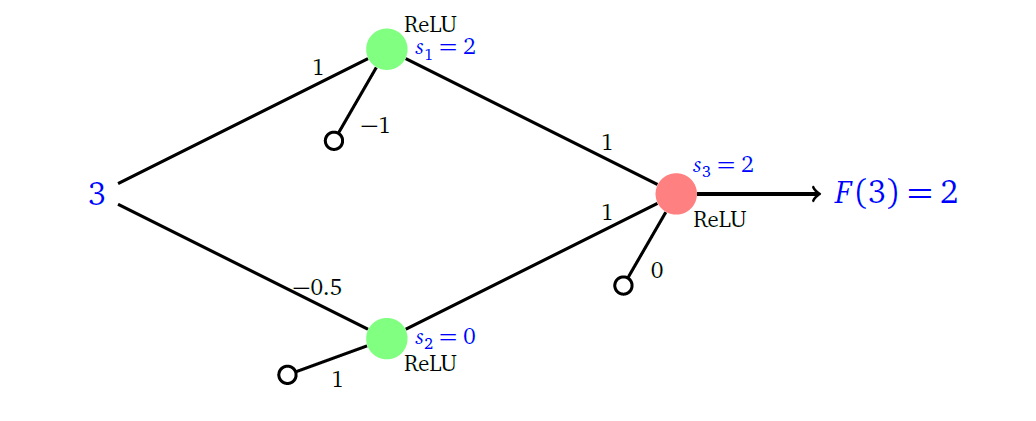

In [3]:
# Architecture du réseau
modele = Sequential()

# Couches de neurones
modele.add(Dense(2, input_dim=1, activation='relu'))
modele.add(Dense(1, activation='relu'))

d:\Talarian\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
modele.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2)              │             4 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7 (28.00 B)

 Trainable params: 7 (28.00 B)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Couche 0
coeff = np.array([[1.,-0.5]])
biais = np.array([-1,1])
poids = [coeff,biais]
modele.layers[0].set_weights(poids)

# Couche 1
coeff = np.array([[1.0],[1.0]])
biais = np.array([0])
poids = [coeff,biais]
modele.layers[1].set_weights(poids)

In [6]:
modele.layers[0].get_weights()

[array([[ 1. , -0.5]], dtype=float32), array([-1.,  1.], dtype=float32)]

In [7]:
entree = np.array([[3.0]])
sortie = modele.predict(entree)
entree, sortie

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


(array([[3.]]), array([[2.]], dtype=float32))

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


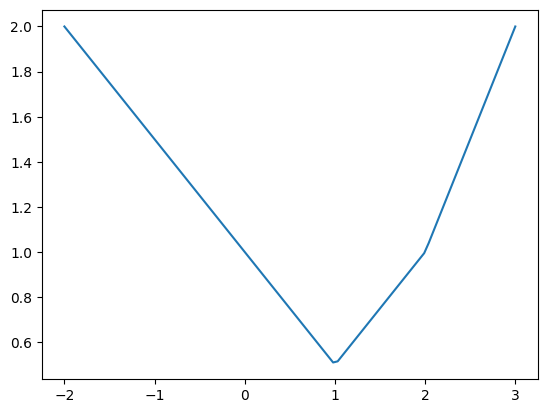

In [8]:
import matplotlib.pyplot as plt
liste_x = np.linspace(-2, 3, num=100)
entree = np.array([[x] for x in liste_x])
sortie = modele.predict(entree)
liste_y = np.array([y[0] for y in sortie])
plt.plot(liste_x,liste_y)
plt.show()

## Autre exemple

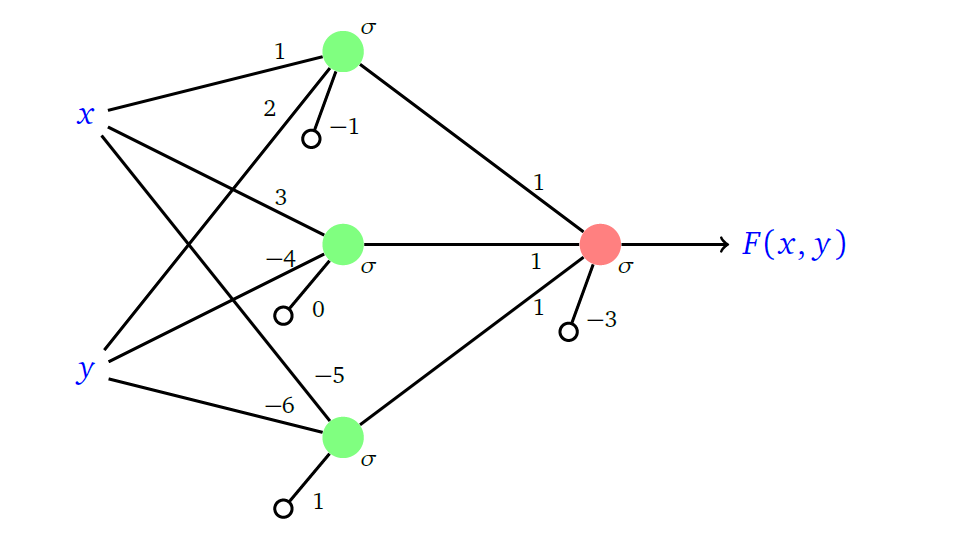

In [39]:
import tensorflow as tf

In [40]:
modele2 = Sequential()

modele2.add(Dense(3, input_dim=2, activation="sigmoid"))
modele2.add(Dense(1, activation=lambda x: 1/(1+tf.exp(-x))))

modele2.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
modele2.get_weights()

[array([[ 1.0640347 ,  0.79140985, -0.9347915 ],
        [-0.16572249,  0.33166492, -0.9282224 ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[ 0.06742382],
        [ 1.1010317 ],
        [-0.549359  ]], dtype=float32),
 array([0.], dtype=float32)]

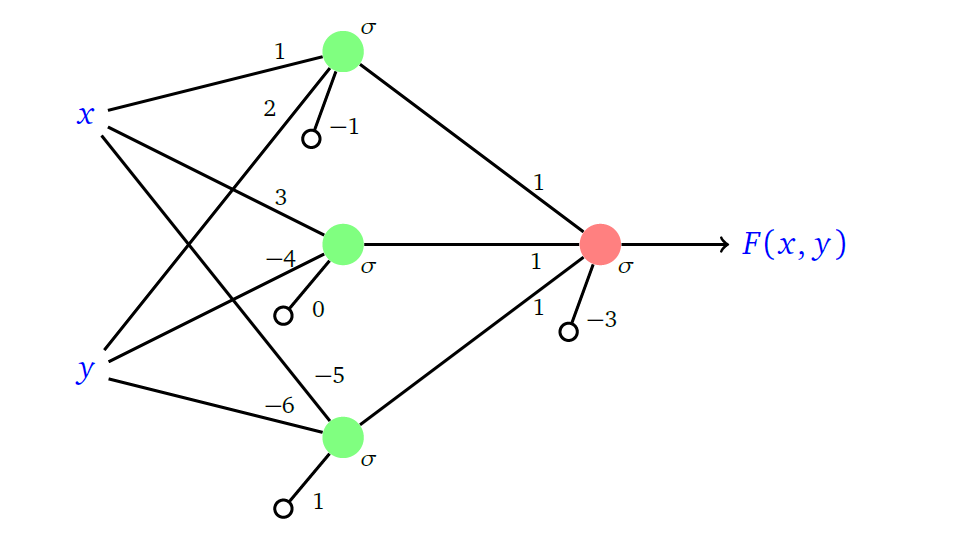

In [42]:
# Couche 0
coeff2 = np.array([[1., 3, -5], [2.,-4,-6]])
biais2 = np.array([-1,0,1])
poids2 = [coeff2,biais2]
modele2.layers[0].set_weights(poids2)

# Couche 1
coeff2 = np.array([[1.0],[1.0],[1.0]])
biais2 = np.array([-3])
poids2 = [coeff2,biais2]
modele2.layers[1].set_weights(poids2)

In [36]:
modele2.get_weights()

[array([[ 1.,  3., -5.],
        [ 2., -4., -6.]], dtype=float32),
 array([-1.,  0.,  1.], dtype=float32),
 array([[1.],
        [1.],
        [1.]], dtype=float32),
 array([-3.], dtype=float32)]

In [43]:
entree = np.array([[7,-5]])
sortie = modele2.predict(entree)
entree, sortie

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step


(array([[ 7, -5]]), array([[0.12303182]], dtype=float32))

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


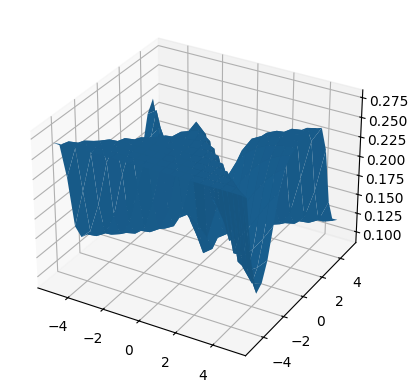

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
VX = np.linspace(-5, 5, 20)
VY = np.linspace(-5, 5, 20)
X,Y = np.meshgrid(VX, VY)
entree = np.c_[X.ravel(), Y.ravel()]
sortie = modele2.predict(entree)
Z = sortie.reshape(X.shape)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

## SUite

In [53]:
modele = Sequential()
modele.add(Dense(1, input_dim=1, activation=lambda x: tf.where(x >= 0, 1.0, 0.0)))
modele.layers[0].set_weights([np.array([[-.5]]), np.array([1])])

In [54]:
modele.predict(np.array([[0.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


array([[1.]], dtype=float32)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


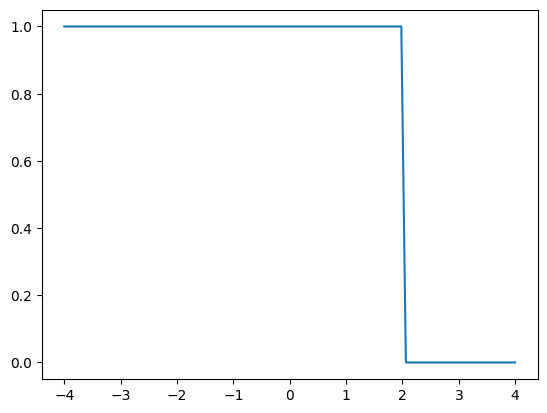

In [55]:
import matplotlib.pyplot as plt
liste_x = np.linspace(-4, 4, num=100)
entree = np.array([[x] for x in liste_x])
sortie = modele.predict(entree)
liste_y = np.array([y[0] for y in sortie])
plt.plot(liste_x,liste_y)
plt.show()

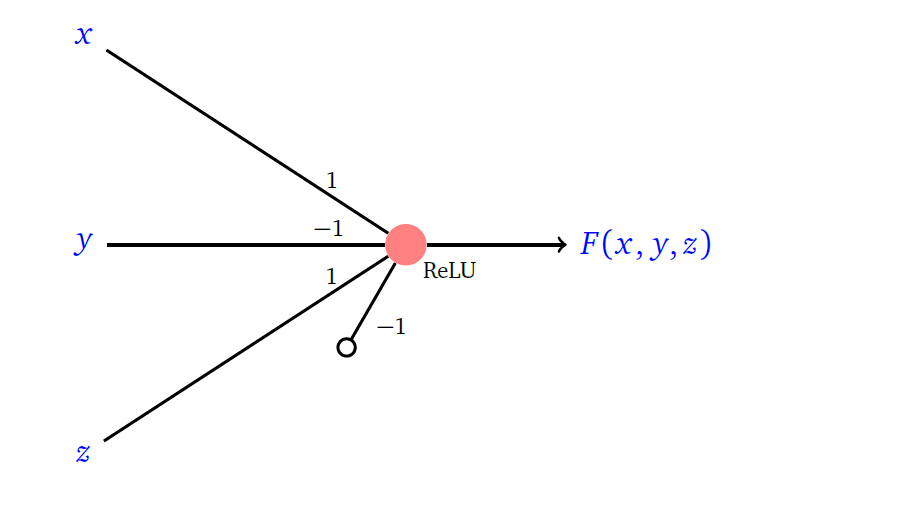

In [94]:
modele = Sequential()
modele.add(Dense(1, input_dim=3, activation="relu"))
modele.layers[0].set_weights([np.array([[1.], [-1.], [1.]]), np.array([-1.0])])

modele.predict(np.array([[2.0,3.0,4.0]]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


array([[2.]], dtype=float32)

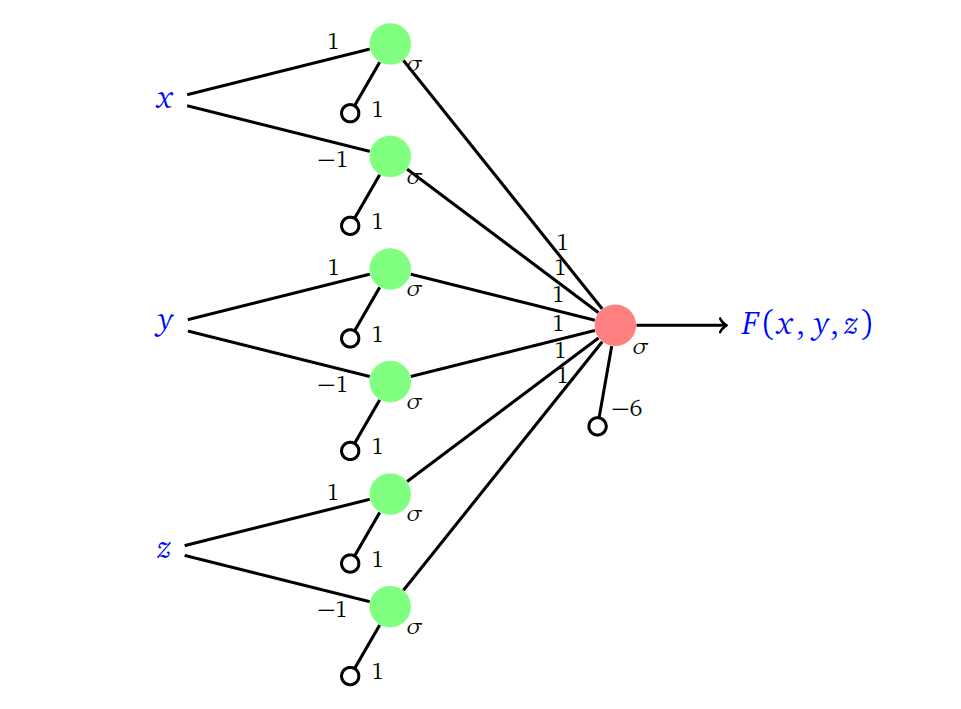

In [113]:
modele = Sequential()
modele.add(Dense(6, input_dim=3, activation=lambda x: tf.where(x >= 0, 1.0, 0.0)))
modele.add(Dense(1, activation=lambda x: tf.where(x >= 0, 1.0, 0.0)))

modele.layers[0].set_weights([
    np.array([
        [1., -1., 0., 0., 0., 0.],
        [0., 0., 1., -1., 0., 0.],
        [0., 0., 0., 0., 1., -1.]
    ]), 
    np.array([1., 1., 1., 1., 1., 1.])
])
modele.layers[1].set_weights([
    np.array([[1.], [1.], [1.], [1.], [1.], [1.]]), np.array([-6])
])
modele.get_weights()

d:\Talarian\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


[array([[ 1., -1.,  0.,  0.,  0.,  0.],
        [ 0.,  0.,  1., -1.,  0.,  0.],
        [ 0.,  0.,  0.,  0.,  1., -1.]], dtype=float32),
 array([1., 1., 1., 1., 1., 1.], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([-6.], dtype=float32)]

In [ ]:
evaluate_model_on_grid(modele, resolution=10)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def evaluate_model_on_grid(model, x_range=(-3, 3), y_range=(-3, 3), z_range=(-3, 3), resolution=10):
    """
    Évalue un modèle sur une grille 3D et affiche un nuage de points coloré.
    
    Paramètres :
        model : un objet possédant une méthode predict(x, y, z)
        x_range, y_range, z_range : tuples définissant les intervalles d'évaluation
        resolution : nombre de points par axe
    """
    # Création des listes x, y, z
    x_list = np.linspace(*x_range, resolution)
    y_list = np.linspace(*y_range, resolution)
    z_list = np.linspace(*z_range, resolution)

    # Création de la grille 3D
    X, Y, Z = np.meshgrid(x_list, y_list, z_list)
    
    # Initialisation de la liste des prédictions
    F_values = np.zeros_like(X, dtype=float)

    # Calcul des prédictions pour chaque (x, y, z)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            for k in range(X.shape[2]):
                F_values[i, j, k] = model.predict(np.array([[X[i, j, k], Y[i, j, k], Z[i, j, k]]]))

    # Création de la figure
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')

    # Affichage des points en 3D
    ax.scatter(X, Y, Z, c=F_values, cmap="viridis", alpha=0.8)

    # Labels et titre
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.set_title("Prédictions du modèle sur la grille 3D")

    plt.show()

# # Exemple d'un modèle fictif
# class DummyModel:
#     def predict(self, x, y, z):
#         return np.sin(x) * np.cos(y) + z**2  # Exemple de fonction

# # Test de la fonction avec un modèle factice
# dummy_model = DummyModel()
evaluate_model_on_grid(modele, resolution=10)


## Approximation

In [65]:
f = lambda x: np.cos(2*x)+x*np.sin(3*x)+np.sqrt(x)
f(3)

np.float64(3.928576549944513)

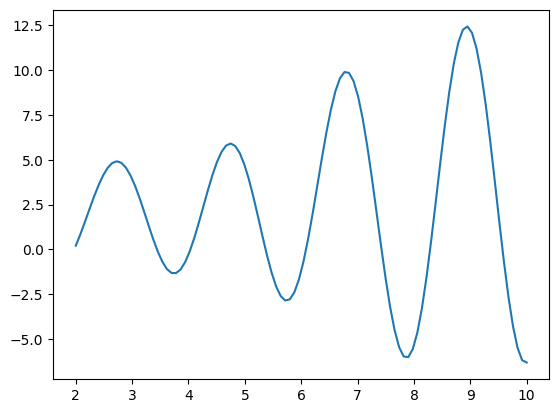

In [62]:
import matplotlib.pyplot as plt
liste_x = np.linspace(2, 10, num=100)
entree = np.array([[x] for x in liste_x])
sortie = f(entree)
liste_y = np.array([y[0] for y in sortie])
plt.plot(liste_x,liste_y)
plt.show()

In [81]:
import numpy as np
import matplotlib.pyplot as plt

def approx_fonction_en_escalier(f, a, b, n, methode="gauche"):
    """
    Approxime une fonction continue f(x) sur [a, b] par une fonction en escalier avec n intervalles.
    
    Paramètres :
        f : function, la fonction à approximer
        a, b : float, bornes de l'intervalle
        n : int, nombre d'intervalles
        methode : str, "gauche", "droite" ou "milieu" pour choisir la valeur de référence par intervalle
    """
    x = np.linspace(a, b, 1000)  # Points pour tracer f(x)
    y = f(x)

    # Découpage de l'intervalle
    x_intervalles = np.linspace(a, b, n+1)  # n+1 points définissant n intervalles
    pas = (b - a) / n

    # Choix des hauteurs des rectangles
    if methode == "gauche":
        x_points = x_intervalles[:-1]  # Extrémité gauche
    elif methode == "droite":
        x_points = x_intervalles[1:]  # Extrémité droite
    elif methode == "milieu":
        x_points = (x_intervalles[:-1] + x_intervalles[1:]) / 2  # Milieu
    else:
        raise ValueError("Méthode non reconnue : choisir 'gauche', 'droite' ou 'milieu'")

    y_intervalles = f(x_points)  # Valeurs de la fonction en ces points

    # Tracé de la fonction originale
    plt.plot(x, y, 'b-', linewidth=1, label=r"$f(x)$")  

    # Tracé de l'approximation en escalier
    for i in range(n):
        plt.hlines(y_intervalles[i], x_intervalles[i], x_intervalles[i+1], color='red', linewidth=2)
        plt.vlines(x_intervalles[i+1], min(y_intervalles[i], 0), y_intervalles[i], color='pink', linewidth=1)

    # Labels et affichage
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.title(f"Approximation en escalier de f(x) avec {n} intervalles ({methode})")
    plt.grid(True)
    plt.show()
    
import numpy as np
import matplotlib.pyplot as plt

def approx_fonction_continue(f, a, b, n, methode="gauche"):
    """
    Approxime une fonction continue f(x) sur [a, b] par une fonction en escalier continue par morceaux.

    Paramètres :
        f : function, la fonction à approximer
        a, b : float, bornes de l'intervalle
        n : int, nombre d'intervalles
        methode : str, "gauche", "droite" ou "milieu" pour choisir la valeur de référence par intervalle
    """
    x = np.linspace(a, b, 1000)  # Points pour tracer f(x)
    y = f(x)

    # Découpage de l'intervalle
    x_intervalles = np.linspace(a, b, n+1)  # n+1 points définissant n intervalles
    pas = (b - a) / n

    # Choix des points d'échantillonnage
    if methode == "gauche":
        x_points = x_intervalles[:-1]  # Extrémité gauche
    elif methode == "droite":
        x_points = x_intervalles[1:]  # Extrémité droite
    elif methode == "milieu":
        x_points = (x_intervalles[:-1] + x_intervalles[1:]) / 2  # Milieu
    else:
        raise ValueError("Méthode non reconnue : choisir 'gauche', 'droite' ou 'milieu'")

    y_intervalles = f(x_points)  # Valeurs de la fonction en ces points

    # Construction des points pour une courbe continue par morceaux
    x_stairs = np.repeat(x_intervalles, 2)[1:-1]  # On répète les x sauf le premier et dernier en double
    y_stairs = np.repeat(y_intervalles, 2)  # Chaque y est répété 2 fois pour la continuité

    # Tracé de la fonction originale
    plt.plot(x, y, 'b-', linewidth=1, label=r"$f(x)$")  

    # Tracé de la fonction en escalier continue
    plt.plot(x_stairs, y_stairs, 'r-', linewidth=1, label="Approximation en escalier")

    # Labels et affichage
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.title(f"Approximation en escalier continue avec {n} intervalles ({methode})")
    plt.grid(True)
    plt.show()


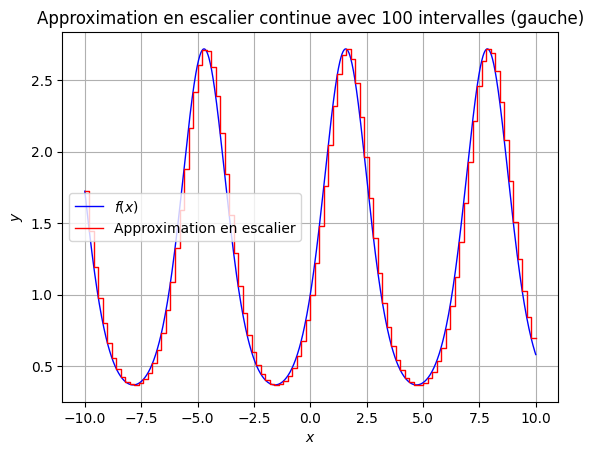

In [ ]:
approx_fonction_continue(f, a=-10, b=10, n=100, methode="gauche")

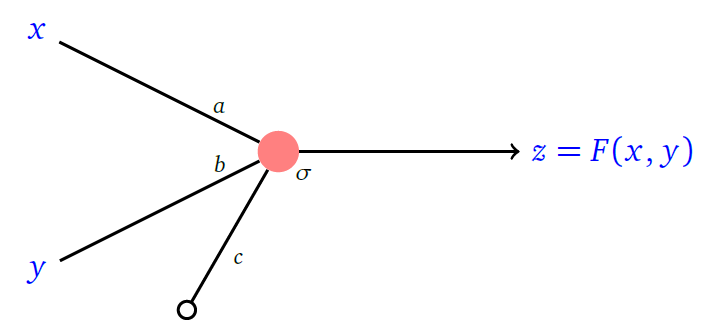

$$
\begin{aligned}
E_i &= (\sigma(ax_i+by_i+c)-z)^2\quad \sigma(x)={1\over 1+e^{-x}}\quad \sigma'(x)=\sigma(x)(1-\sigma(x))\\

\nabla E_i(a, b, c) &= 
    \begin{pmatrix}
        {\delta E_i \over \delta a}\\
        {\delta E_i \over \delta b}\\
        {\delta E_i \over \delta c}
    \end{pmatrix}=
    \begin{pmatrix}
        2x_i\sigma'_i(\sigma_i-z)\\
        2y_i\sigma'_i(\sigma_i-z)\\
        2\sigma'_i(\sigma_i-z)
    \end{pmatrix}=
    \begin{pmatrix}
        2x_i\sigma_i(1-\sigma_i)(\sigma_i-z)\\
        2y_i\sigma_i(1-\sigma_i)(\sigma_i-z)\\
        2\sigma_i(1-\sigma_i)(\sigma_i-z)
    \end{pmatrix}\\
    with\ \sigma_i=\sigma(ax_i+by_i+c)
\end{aligned}
$$

In [1]:
import numpy as np
import pandas as pd
sigmoid = lambda x: 1/(1+np.exp(-x))


ronds_bleus = [(0, 3), (1, 1.5), (1, 4), (1.5, 2.5), (2, 2.5), (3, 3.5), (3.5, 3.25), (4, 3), (4, 4), (5, 4)]
carres_rouges = [(1, 1), (2, 0.5), (2, 2), (3, 1.5), (3, 2.75), (4, 1), (4, 2.5), (4.5, 3), (5, 1), (5, 2.25)]

data = pd.DataFrame({
    "x": [p[0] for p in ronds_bleus] + [p[0] for p in carres_rouges],
    "y": [p[1] for p in ronds_bleus] + [p[1] for p in carres_rouges],
    "z": [0] * len(ronds_bleus) + [1] * len(carres_rouges)
})

f = lambda a, b, c, x, y: sigmoid(a*x+b*y+c)

def gradient(theta):
    theta = np.array(theta, dtype=float).reshape(-1)
    a, b, c = theta
    return (1/len(data))*np.array([
        sum([2*x*f(a, b, c, x, y)*(1-f(a, b, c, x, y))*(f(a, b, c, x, y)-z) for x, y, z in data.itertuples(index=False)]),
        sum([2*y*f(a, b, c, x, y)*(1-f(a, b, c, x, y))*(f(a, b, c, x, y)-z) for x, y, z in data.itertuples(index=False)]),
        sum([2*f(a, b, c, x, y)*(1-f(a, b, c, x, y))*(f(a, b, c, x, y)-z) for x, y, z in data.itertuples(index=False)])
    ])
    
def E(theta):
    a, b, c = np.array(theta, dtype=float).reshape(-1)
    return (1/len(data))*np.array(sum([(f(a, b, c, x, y)-z)**2 for x, y, z in data.itertuples(index=False)]), dtype=float).reshape(-1)

E((0, 0, 0)), gradient((0, 0, 0))

(array([0.25]), array([-0.10625 ,  0.171875,  0.      ]))

In [2]:
import numpy as np
import pandas as pd

def gradient_descent(E, gradient, initial_theta, learning_rate=0.01, n_iter=1000, tolerance=1e-6):
    """
    Effectue une descente de gradient pour minimiser une fonction donnée à plusieurs variables.
    
    :param gradient: Fonction qui calcule le gradient de la fonction de coût.
    :param initial_theta: Point de départ sous forme de vecteur numpy.
    :param learning_rate: Taux d'apprentissage (par défaut 0.01).
    :param n_iter: Nombre maximal d'itérations (par défaut 1000).
    :param tolerance: Critère d'arrêt si le changement est inférieur à cette valeur.
    :return: Le vecteur des paramètres optimisés.
    """
    theta = np.array(initial_theta, dtype=float).reshape(-1)
    save = {"k": [], "Pk": [], "grad_Ek": [], "Ek": []} # []
    for _ in range(n_iter):
        grad = np.array(gradient(theta)).reshape(-1)
        err = np.array(E(theta)).reshape(-1)
        
        save["k"].append(_)
        save["Pk"].append(theta)
        save["grad_Ek"].append(grad)
        save["Ek"].append(err)
        
        # save.append({"k": _, "Pk": theta, "grad_Ek": grad, "Ek": err})
        
        new_theta = theta - learning_rate * grad
        
        if np.linalg.norm(new_theta - theta, ord=2) < tolerance:
            break
        
        theta = new_theta
    
    return theta, save


In [3]:
pk, save = gradient_descent(E, gradient, [0, 1, -2], 1, 1001)

In [4]:
pk

array([ 2.0331896 , -3.860988  ,  3.70478366])

In [5]:
pd.set_option("display.max_colwidth", None)

In [6]:
results = pd.DataFrame(save)
results

,k,Pk,grad_Ek,Ek
0,0,"[0.0, 1.0, -2.0]","[-0.07742597934669865, 0.1923976630907675, 0.0058988136175632915]",[0.4502540404428175]
1,1,"[0.07742597934669865, 0.8076023369092324, -2.0058988136175633]","[-0.07229789519853091, 0.21367880327269373, 0.006912417227522762]",[0.404989862046671]
2,2,"[0.14972387454522956, 0.5939235336365387, -2.012811230845086]","[-0.09447201822571616, 0.1889931119669322, -0.006215393829874911]",[0.355037087550237]
3,3,"[0.24419589277094572, 0.4049304216696065, -2.006595837015211]","[-0.12051737190317827, 0.13725086761458327, -0.02377902084193509]",[0.31364720438246924]
4,4,"[0.364713264674124, 0.26767955405502325, -1.9828168161732758]","[-0.0905641894390743, 0.12676776854549063, -0.024080204334560304]",[0.2821200530452492]
...,...,...,...,...
996,996,"[2.031447153963163, -3.85729467902615, 3.7004247468685856]","[-0.0003496106963688812, 0.0007410845595278142, -0.0008747552608325409]",[0.07110373140424375]
997,997,"[2.031796764659532, -3.858035763585678, 3.701299502129418]","[-0.00034904903080637415, 0.0007398718149548217, -0.0008732655453492843]",[0.0711022959727458]
998,998,"[2.0321458136903385, -3.8587756354006326, 3.7021727676747673]","[-0.0003484885293459024, 0.0007386616729927707, -0.000871779220067254]",[0.07110086532908688]
999,999,"[2.0324943022196846, -3.8595142970736256, 3.7030445468948345]","[-0.00034792918879912024, 0.0007374541260887302, -0.0008702962743843928]",[0.07109943945470998]


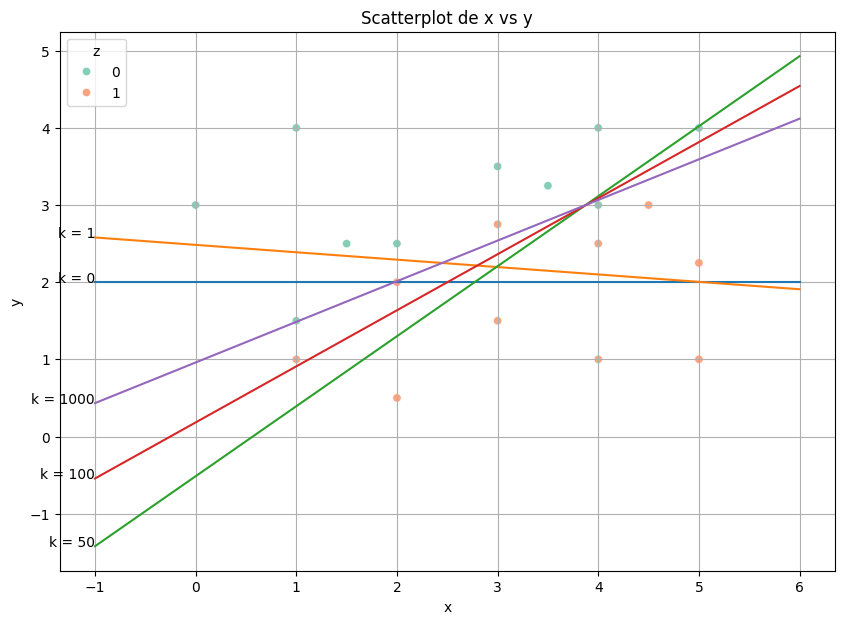

In [30]:
from modules.plots import Plots
import matplotlib.pyplot as plt
Plots(data).scatter("x", "y", "z", figsize=(10, 7))
ks = [0, 1, 50, 100, 1000]
droites = [results.query(f"k=={k}").loc[:, "Pk"].iloc[0].tolist() for k in ks]
x_range = np.linspace(min(data.x) - 1, max(data.x) + 1, 100)
for i, (a, b, c) in enumerate(droites):
    if b != 0:
        y_range = (-a / b) * x_range - (c / b)
        plt.plot(x_range, y_range, label=f"k = {ks[i]}")
        
        # Placer l'étiquette sur un point au milieu de la droite
        x_mid = x_range[0]
        y_mid = (-a / b) * x_mid - (c / b)
        plt.text(x_mid, y_mid, f"k = {ks[i]}", fontsize=10, ha="right")
        
# plt.legend()

In [43]:
a, b, c = results.loc[results.k==1000, "Pk"].iloc[0]
F = lambda x, y: sigmoid(a*x+b*y+c)
F(4, 3)

np.float64(0.563290807165271)

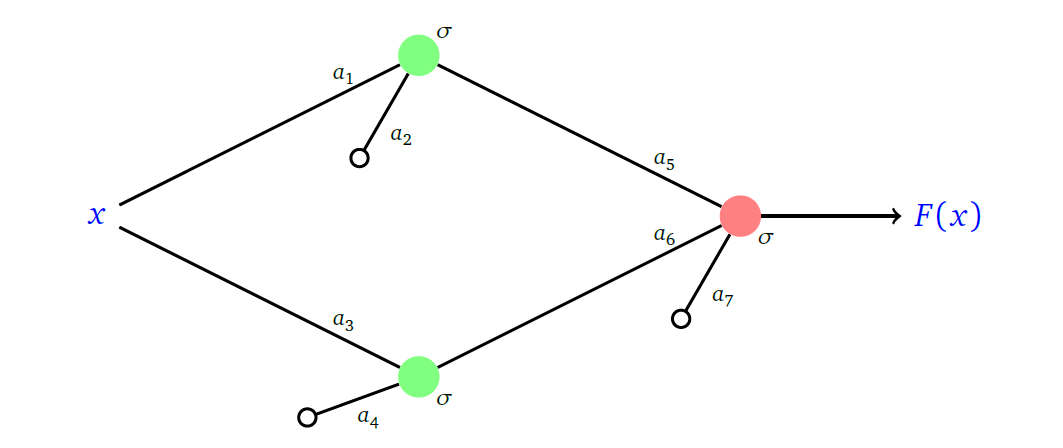

$$
F(a_1, \cdots, a_7, x) = \sigma\big(a_5\sigma(a_1x+a_2) + a_6\sigma(a_3x+a_4) + a_7\big)\\

E = \sum_{i=1}^N E_i = \sum_{i=1}^N (F(a_1, \cdots, a_7, x_i)-z_i)^2\quad
$$

Points positifs : 18585
Points négatifs : 21415
(40000, 2)
(40000, 1)
(40000, 2)
(40000, 1)
Epoch 1/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4624
Epoch 2/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4642
Epoch 3/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4659
Epoch 4/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4610
Epoch 5/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4643
Epoch 6/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4653
Epoch 7/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4625
Epoch 8/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4656
Epoch 9/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4663
Epoch 10/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4666
Epoch 11/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4662
Epoch 12/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4640
Epoch 13/100
400/400 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4622
Epoch 14/100
400/400

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 100)            │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 61,805 (241.43 KB)

 Trainable params: 20,601 (80.47 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 41,204 (160.96 KB)

None
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


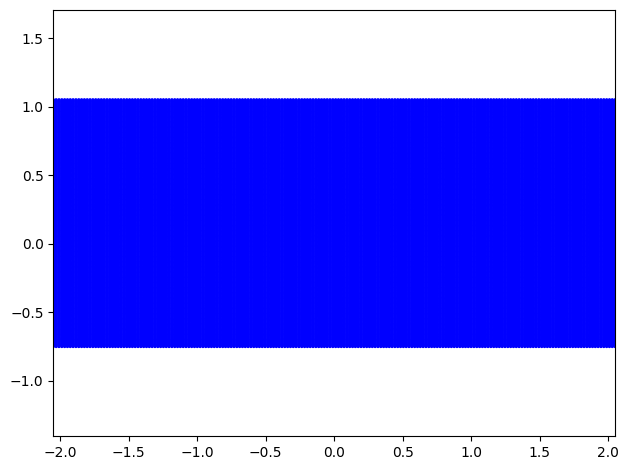

In [ ]:
#!/usr/bin/python3

import numpy as np
from tensorflow import keras
# from tensorflow.keras import backend as K
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt

### Partie A - Création des données

n = 200  # pour le nb de points dans la grille
xmin, xmax, ymin, ymax = -2.05, 2.05, -0.75, 1.05

# Fonction f : lemniscate de Bernouilli + ellipse
def f(x,y):
    res = ((x**2+y**2)**2 - 4*(x**2-y**2))*((x-1/2)**2 + 4*(y-1/3)**2-2)
    # res = ((x**2+y**2)**2 - 4*(x**2-y**2))
    return  res


# Generations des points rouges/bleus
# Rouge si f <= 0, bleu sinon
def donnees(n):
    VX = np.linspace(xmin, xmax, n)
    VY = np.linspace(ymin, ymax, n)
    X, Y = np.meshgrid(VX, VY)
    Z = f(X, Y)
    Zbool = Z <= 0
    Zint = Zbool.astype(np.int64)
    return X, Y, Zint


# Test   
X, Y, Z = donnees(n)
# print(X,Y,Z)
plus = np.sum(Z)
moins = np.size(Z)-plus
print("Points positifs :",plus)
print("Points négatifs :",moins)


def donnees_keras(n):
    X, Y, Z = donnees(n)
    X = X.flatten()
    Y = Y.flatten()

    # Z = Z.flatten()
    liste_points = []
    for i in range(n**2):
        points = (X[i], Y[i])
        liste_points.append(points)

    entree = np.array(liste_points)
    # print(entree)
    print(entree.shape)

    sortie = Z.reshape((n**2,1))

    # print(sortie)
    print(sortie.shape)
    return entree, sortie

# Test
donnees_keras(n)

# Affichage
def graphique_donnees(X,Y,Z):

    # for x, y in carres_rouges:    # points
    #     plt.scatter(x, y, marker='s', color='red')
    # for x, y in ronds_bleus:    # points
    #     plt.scatter(x, y, color='blue')   

    plt.scatter(X, Y, c=Z, s=2, cmap='bwr')

    plt.axis('equal')
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.tight_layout()
    # plt.savefig('retro_05_p=5.png')
    plt.show()
    return

# Test 
# graphique_donnees(X,Y,Z)


### Partie B - Réseau de neurones

modele = Sequential()

p = 100
q = p
r = p

# 2 entrées (x,y), 
# première couche : p neurones
# deuxième couche : q neurones
# troisième couche (sortie) : 1 neurone 
# activation = à voir

# Première couche : p neurones (entrée de dimension 2)
modele.add(Dense(p, input_dim=2, activation='relu'))

# Deuxième couche : q neurones
modele.add(Dense(q, activation='relu'))

# Troisième couche : r neurones
modele.add(Dense(r, activation='relu'))

# Couche de sortie : 1 neurone
modele.add(Dense(1, activation='relu'))

# Descente de gradient
# mysgd = optimizers.SGD(lr=0.1)
# modele.compile(loss='mean_squared_error', optimizer=mysgd)
modele.compile(loss='mean_squared_error', optimizer='adam')

# Données
X_train, Y_train = donnees_keras(n)

# Calcul des poids
# modele.fit(X_train, Y_train, epochs=10000, batch_size=len(X_train), verbose = 1)
modele.fit(X_train, Y_train, epochs=100, batch_size=100, verbose = 1)

print(modele.summary())

### Partie C - Résultats

Zpredict = modele.predict(X_train)
Zpredict = Zpredict.reshape((n,n))
Zbool = Zpredict >= 0.5
Zint = Zbool.astype(np.int64)
# print(Z)
# print(Zpredict)
graphique_donnees(X, Y, Zint)


# Probleme

In [8]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
import numpy as np

In [9]:
import itertools
import pandas as pd

def generate_configurations(n):
    # Liste toutes les combinaisons possibles de 3 cases noircies parmi n
    combinaisons = list(itertools.combinations(range(n), 3))
    
    # Initialiser les listes pour le dataframe
    data = []

    for comb in combinaisons:
        i, j, k = comb  # Indices des cases noircies
        config = [0] * n  # Initialisation à 0
        config[i], config[j], config[k] = 1, 1, 1  # Noircir les cases

        # Calcul de la hauteur
        h = k - i + 1
        
        # Ajout à la liste des données
        data.append(config + [h])

    # Création du DataFrame
    columns = [f"x{i+1}" for i in range(n)] + ["hauteur"]
    df = pd.DataFrame(data, columns=columns)
    
    return df

# Exemple avec n = 8
df_config = generate_configurations(20)
df_config

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x12,x13,x14,x15,x16,x17,x18,x19,x20,hauteur
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
2,1,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
3,1,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,1,1,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1135,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,1,5
1136,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,3
1137,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,1,4
1138,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,1,1,4


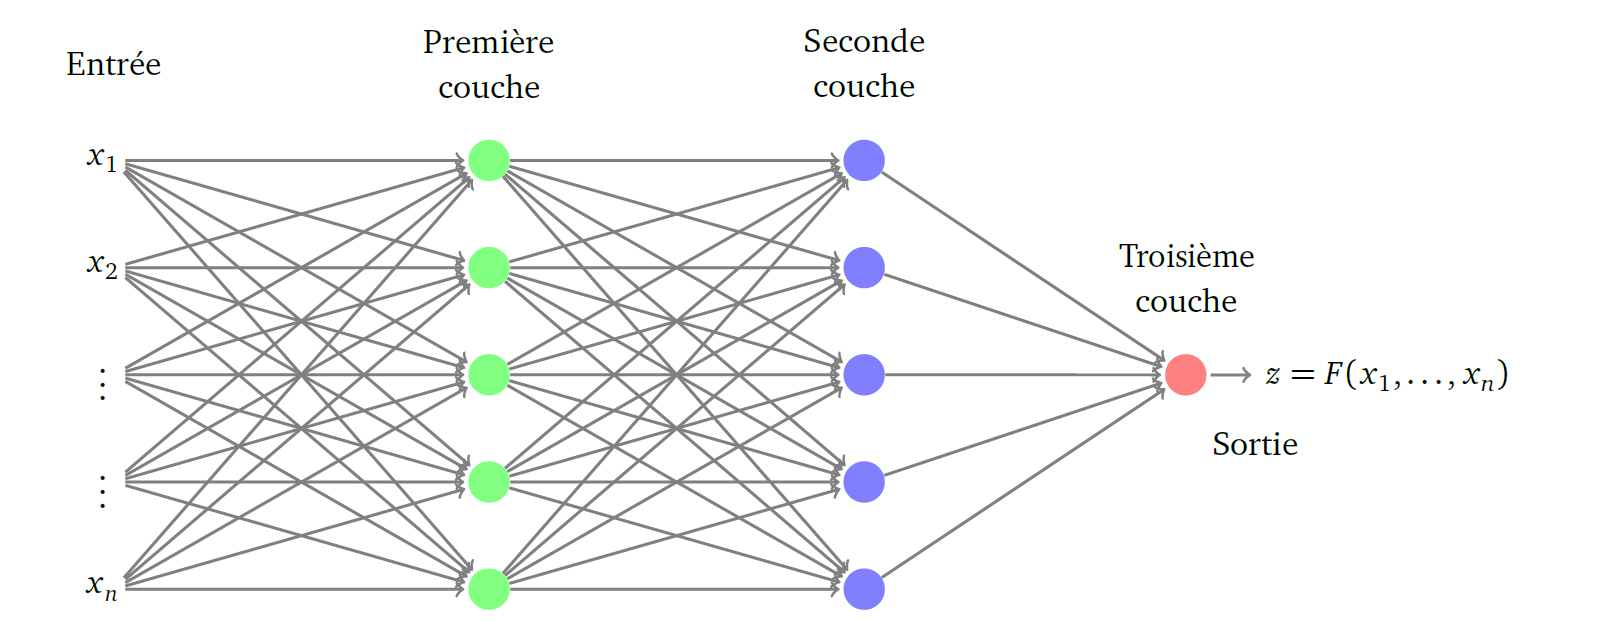

In [11]:
from sklearn.model_selection import train_test_split

# Séparation des features (X) et de la target (y)
X = df_config.drop(columns=["hauteur"])  # Toutes les colonnes sauf la cible
y = df_config["hauteur"]  # La cible

# Division en 50% train, 50% test en mélangeant
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# Affichage
n = len(X)
# print(X_train.shape, y_train.shape, X_test.shape, y_test.shape, n)

import numpy as np

X_train = np.array(X_train, dtype=np.float32)
y_train = np.array(y_train, dtype=np.int64)

X_test = np.array(X_test, dtype=np.float32)
y_test = np.array(y_test, dtype=np.int64)

p = 10
n_input = 20
modele = Sequential()

modele.add(Dense(p, input_dim=n_input, activation="relu"))
modele.add(Dense(p, activation="relu"))
modele.add(Dense(1, activation="relu"))


n_test = n*0.5
modele.compile(loss='mean_squared_error', optimizer='adam')
modele.fit(X_train, y_train, epochs=100, batch_size=1, verbose = 0)


y_test_pred = modele.predict(X_test)
y_test_pred = np.where(y_test_pred >= 0, np.round(y_test_pred), 0)
y_train_pred = modele.predict(X_train)
y_train_pred = np.where(y_train_pred >= 0, np.round(y_train_pred), 0)

np.mean(y_train_pred.ravel().astype(np.int64) == y_train)*100, np.mean(y_test_pred.ravel().astype(np.int64) == y_test)*100

d:\Projet\formation\.venv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


(np.float64(85.08771929824562), np.float64(74.73684210526315))

# MNIST

In [9]:
from tensorflow.keras.datasets import mnist
(X_train_data,Y_train_data),(X_test_data,Y_test_data) = mnist.load_data()
N = X_train_data.shape[0]

In [4]:
i = 0
X_train_data[i], Y_train_data[i]

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
           0

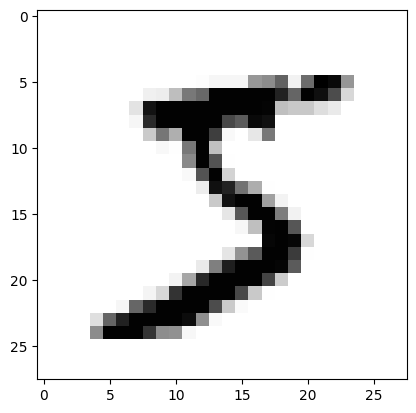

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train_data[i], cmap='Greys')

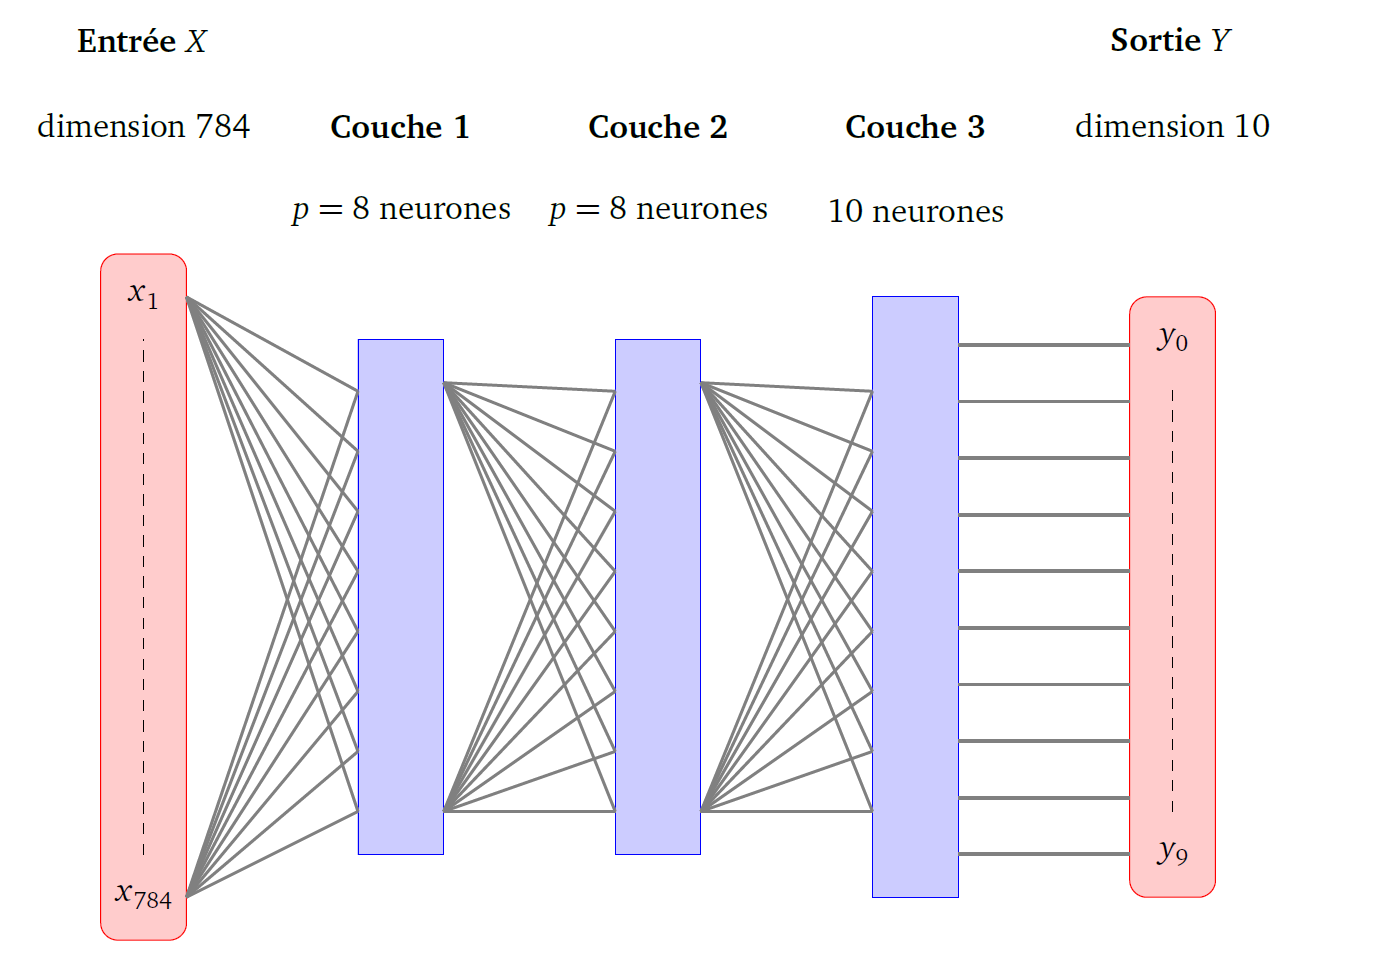

In [18]:
X_train = np.reshape(X_train_data,(N, 784)) # vecteur image
X_train = X_train/255 # normalisation

In [20]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train_data, num_classes=10)

In [25]:
# Données de test
X_test = np.reshape(X_test_data,(X_test_data.shape[0],784))
X_test = X_test/255
Y_test = to_categorical(Y_test_data, num_classes=10)

In [30]:
import numpy as np
from tensorflow import keras


p, q, r = 8, 8, 10
modele = Sequential()

modele.add(Dense(p, input_dim=28*28, activation="sigmoid"))
modele.add(Dense(q, activation="sigmoid"))
modele.add(Dense(r, activation="softmax"))


modele.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
modele.fit(X_train, Y_train, batch_size=32, epochs=40, verbose=0)

resultat = modele.evaluate(X_test, Y_test, verbose=0)
print('Valeur de l''erreur sur les données de test (loss):', resultat[0])
print('Précision sur les données de test (accuracy):', resultat[1])


Valeur de lerreur sur les données de test (loss): 0.3672339618206024
Précision sur les données de test (accuracy): 0.9041000008583069


In [35]:
Y_pred = modele.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [40]:
i = 2
Y_test[i], Y_pred[i]

(array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([2.2919526e-06, 9.2064977e-01, 9.8668877e-03, 2.5850231e-02,
        7.8667625e-05, 1.6282227e-04, 7.6524484e-06, 5.9597990e-03,
        2.0672409e-02, 1.6749375e-02], dtype=float32))